# Notebook 12

## Búsqueda de raíces de funciones

#### Python 🐍

> Dr. Ricardo Méndez Fragoso $\mathbb{R} i \vec c \hbar$

En el presente notebook se programará el algoritmo de bisección y el método de Newton para la búsqueda de raíces de funciones. Para un mayor detalle de como se deducen este tipo de algoritmos, se pueden consultar las [notas del curso](http://sistemas.fciencias.unam.mx/~rich/FisComp/).

Las bibliotecas que utilizaremos en este notebook son las siguientes:

In [1]:
from pylab import *

### Método de bisección

Este método se basa en ir dividiendo el intervalo en mitades de tal manera que se va encasillando la raíz de la función. Este proceso se puede realizar hasta obtener la raíz hasta la precisión que uno requiera. En la siguiente función se hace la programación del algoritmo de bisección para la búsqueda de raíces de funciones. 

In [2]:
def raiz_bf(funcion,intervalo,error=1e-4):
    raiz = 0.5*(intervalo[0]+intervalo[1])
    iteracion = 0
    while abs(intervalo[1]-intervalo[0]) > error:
        f_izq , f_med = funcion(intervalo[0]) , funcion(raiz)
        if f_izq*f_med < 0:
            intervalo[1] = raiz
        else:
            intervalo[0] = raiz
        raiz = 0.5*(intervalo[0]+intervalo[1])
        iteracion += 1
    return raiz,iteracion

Como se puede observar, la función anterior nos proporciona la raíz y el número de iteraciones para lograr la precisión necesaria. Probemos el algoritmo anterior con la función $\sin (x)$ en el intervalo $[3,4]$ y el resultado que esperamos es el valor de $\pi =3.1415...$.

In [3]:
raiz_bf(sin,[3.0,4.0],1e-4)

(3.141571044921875, 14)

Como se puede observar, el valor que se obtiene es $\pi$ con cuatro cifras significativas debido a que es la precisión que se tiene por defecto. Además, la función nos indica que el resultado se obtuvo después de 14 pasos. En la siguiente gráfica se puede observar la función $\sin (x)$ y la raíz encontrada.

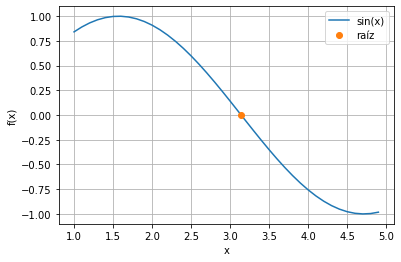

In [4]:
x = arange(1,5,0.1)
raiz = raiz_bf(sin,[3.0,4.0])
plot(x,sin(x),label="sin(x)")
xlabel("x"),ylabel("f(x)")
plot([raiz[0]],[0],"o",label="raíz")
grid(),legend()
show()

Busquemos ahora la raíz de un polinomio de quinto grado, $P(x) = x^5 + 2x^4 - x^3 + 2$, en el intervalo $[-3,0]$. En la siguiente celda se programa dicho polinomio y su derivada que utilizaremos más adelante en este notebook, pero por el momento sólo necesitamos la función del polinomio para este algoritmo.

In [5]:
def polinomio(x):
    return x**5 + 2*x**4 - x**3 + 2

def polinomio_deriv(x):
    return 5*x**4 + 8*x**3 - 3*x**2

Al igual que con el caso anterior, en la siguiente celda buscamos la raíz del polinomio en el intervalo señalado y lo graficamos junto con la raíz encontrada.

Número de iteraciones:  15


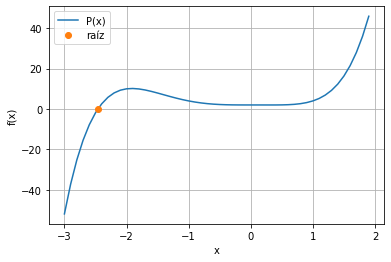

In [6]:
x = arange(-3,2,0.1)
raiz = raiz_bf(polinomio,[-3.0,0.0])
print("Número de iteraciones: ",raiz[1])
plot(x,polinomio(x),label="P(x)")
xlabel("x"),ylabel("f(x)")
plot([raiz[0]],[0],"o",label="raíz")
grid(),legend()
show()

En este caso vemos que se necesitaron 15 pasos para encontrar la raíz deseada. Veamos ahora el algoritmo de Newton.

### Método de Newton

La deducción de este método se encuentra deducido en la las [notas del curso](http://sistemas.fciencias.unam.mx/~rich/FisComp/) y su implementación está dado por la siguiente regla:

$$
x_{n+1} = x_n + \frac{f(x_n)}{f'(x_n)}
$$

Como puede observarse, en este caso es necesario tener la derivada de la función. El método de Newton se encuentra programado en la siguiente celda.

In [7]:
def raiz_Newton(funcion,p_ini,f_prima,error=1e-4):
    iteracion = 0
    while abs(funcion(p_ini)) > error:
        p_ini += -(funcion(p_ini)/f_prima(p_ini))
        iteracion +=1
    return p_ini,iteracion

Obtengamos la raíz de la función seno como en el método anterior, y utilicemos como punto inicial $x=2$.

Valor de la raíz:  3.1415926536808043 Número de iteraciones:  5


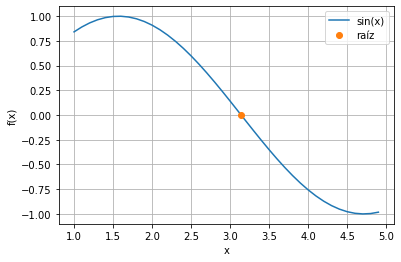

In [8]:
x = arange(1,5,0.1)
raiz = raiz_Newton(sin,2,cos)
print("Valor de la raíz: ",raiz[0],"Número de iteraciones: ",raiz[1])
plot(x,sin(x),label="sin(x)")
xlabel("x"),ylabel("f(x)")
plot([raiz[0]],[0],"o",label="raíz")
grid(),legend()
show()

Como se puede observar, en este caso sólo se necesitaron 5 iteraciones para encontrar la raíz con la misma precisión que con el algoritmo anterior. Veamos ahora el caso de obtener la raíz del polinomio que programamos más arriba. En este caso tomaremos como punto inicial $x=3$.

Valor de la raíz:  -2.4608902204020118 Número de iteraciones:  5


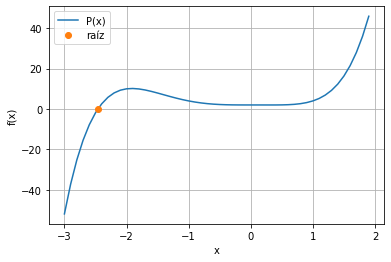

In [9]:
x = arange(-3,2,0.1)
raiz = raiz_Newton(polinomio,-3.0,polinomio_deriv)
print("Valor de la raíz: ",raiz[0],"Número de iteraciones: ",raiz[1])
plot(x,polinomio(x),label="P(x)")
xlabel("x"),ylabel("f(x)")
plot([raiz[0]],[0],'o',label="raíz")
grid(),legend()
show()

En general se tendrá que el método de bisección tendrá un número mayor de iteraciones que el método de Newton y ello lo hace más lento. Sin embargo, en el caso del método de Newton hay que estar relativamente cerca de la raíz para que el algoritmo pueda converger a la raíz que queremos obtener, ya que en el caso de funciones con muchas oscilaciones, este método suele converger a otras raíces si no estamos cerca y en ocasiones el método diverge si nos encontramos en la proximidad de un máximo o mínimo. Esto último se debe a que el método de Newton necesita de la derivada de la función.

Como se puede observar, cada uno de los métodos tiene sus ventajas y desventajas, pero sin duda son dos herramientas muy prácticas y sencilla de implementar para la búsqueda de raíces de funciones.

[Regresar a la página del curso.](http://sistemas.fciencias.unam.mx/~rich/FisComp/)

Se agradece el apoyo del proyecto DGAPA-PAPIME:

+ PE 103021 nueva versión durante el año 2022. Versión interactiva en Colab.
+ PE 112919 durante el año 2020. Idea original.